# Einführung Neuronale Netze




## Erster Header Neuronale Netze mit Tensorflow  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython.display import display, clear_output
from sklearn.metrics import confusion_matrix



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Lade MNIST Datensatz
Handgeschriebene Ziffern, http://yann.lecun.com/exdb/mnist/ 

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
print("Shape:")
print("- Training-set:\t\t{}".format(np.shape(x_train)))
print("- Training-set:\t\t{}".format(np.shape(y_train)))

Shape:
- Training-set:		(60000, 28, 28)
- Training-set:		(60000,)


## Ein paar Plots: 

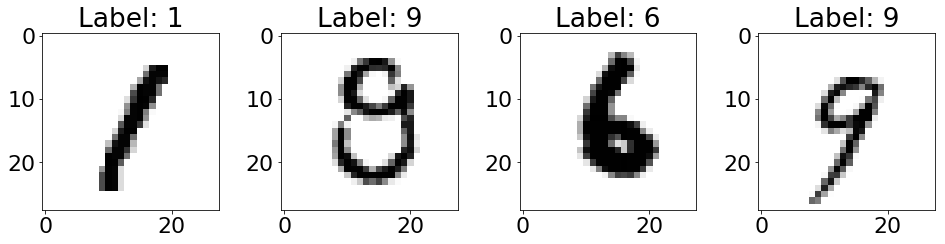

In [4]:

plt.rcParams.update({'font.size': 22}) #adjust font size 

plt.figure(1,figsize=(16,16))
plt.subplot(141) ##1*4 plot 1. plot ->141
plt.imshow(x_train[77], cmap='binary')
plt.title('Label: '+str(y_train[77]))

plt.subplot(142) 
plt.imshow(x_train[80], cmap='binary')
plt.title('Label: '+str(y_train[80]))

plt.subplot(143) 
plt.imshow(x_train[36], cmap='binary')
plt.title('Label: '+str(y_train[36]))

plt.subplot(144) 
plt.imshow(x_train[153], cmap='binary')
plt.title('Label: '+str(y_train[153]))





plt.subplots_adjust(wspace=0.35)



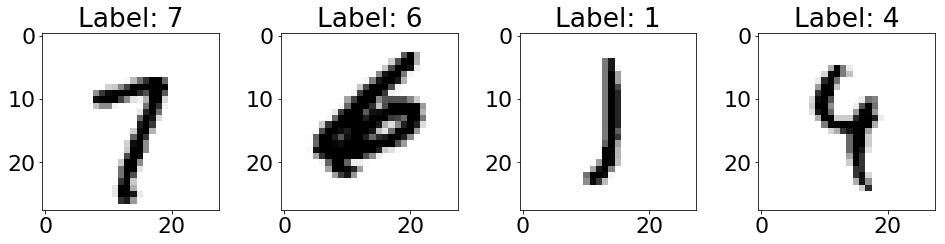

In [5]:
plt.rcParams.update({'font.size': 22}) #adjust font size 

plt.figure(1,figsize=(16,16))
plt.subplot(141) ##1*4 plot 1. plot ->141
plt.imshow(x_train[96], cmap='binary')
plt.title('Label: '+str(y_train[96]))

plt.subplot(142) 
plt.imshow(x_train[665], cmap='binary')
plt.title('Label: '+str(y_train[665]))

plt.subplot(143) 
plt.imshow(x_train[366], cmap='binary')
plt.title('Label: '+str(y_train[366]))

plt.subplot(144) 
plt.imshow(x_train[354], cmap='binary')
plt.title('Label: '+str(y_train[354]))

plt.subplots_adjust(wspace=0.35)

### Laden des CIFAR10 Daten (mittels Keras)

In [6]:

cifar10=tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255 , x_test/255 


print("Shape:")
print("- Training-set:\t\t{}".format(np.shape(x_train)))
print("- Training-set:\t\t{}".format(np.shape(y_train)))

Shape:
- Training-set:		(50000, 32, 32, 3)
- Training-set:		(50000, 1)


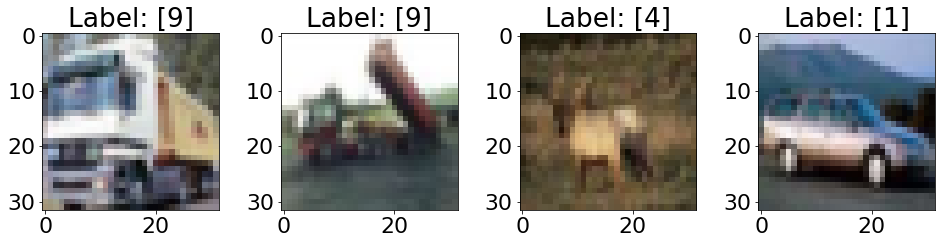

In [7]:

plt.figure(2,figsize=(16,16))
plt.subplot(141) ##1*4 plot 1. plot ->141
plt.imshow(x_train[1], cmap='binary')
plt.title('Label: '+str(y_train[1]))

plt.subplot(142) 
plt.imshow(x_train[2], cmap='binary')
plt.title('Label: '+str(y_train[2]))

plt.subplot(143) 
plt.imshow(x_train[3], cmap='binary')
plt.title('Label: '+str(y_train[3]))

plt.subplot(144) 
plt.imshow(x_train[4], cmap='binary')
plt.title('Label: '+str(y_train[4]))

plt.subplots_adjust( hspace=0.7,
                    wspace=0.35)



### Links:
Datensätze: https://www.kaggle.com/datasets 

Anaconda (Python+jupiter+IDE+...): https://www.anaconda.com/distribution

Tensorflow (Python-Bibliothek Deep-Learning): https://www.tensorflow.org -> in Anaconda https://anaconda.org/conda-forge/tensorflow 

Jupyter notebook online environment: https://colab.research.google.com/notebooks/welcome.ipynb (mit GPU)



## Trainieren eines Klassifizierers 
Der folgende Graph skizziert grob das Training eine Klassifierers (Vorhersagemodells). Im Bereich des maschinellen Lernens wird dieses Art des Trainierens $\textbf{überwachtes Lernen}$ genannt. Dabei drückt der Zusatz "überwacht" aus, dass ein gelabelter Datensatz im Training verwendet wird, d.h. Daten, von dem man die gewünschte Klassifikation (oder Vorhersage) bereits kennt.  

![Image](Images/Training_ML.png)


Im Fall eines Neuronalen Netzes (NN) ist die "black box" (ungefähr) von folgender Form: 



<img src="Images/NN_ar_03.png" alt="drawing" width="700"/>

Dabei sind die Weights- und Bias-Vektoren die Parameter des NN, die während des Trainings (in der Parameteranpassung) angepasst werden. Dabei werden diese Parameter so angepasst, dass die Abweichung der Vorhersage (Klassifizierung) des NN zur gewünschten Ausgabe möglichst klein wird. 
Die Anzahl der Neuronen, Schichten und Verbindungen sind normalerweise fest implementiert. Genauso wird die Aktivierungsfunktion in der Regel fest gewählt. Typische Beispiele für Aktivierungsfunktionen sind

### $\sigma(x)=\max(x,0)$ (Rectified Linear Unit (ReLU))
### $\sigma(x)=\frac{1}{1-e^{-x}}$ (Sigmoid)


## Beispiel: Ein (künstliches) Neuron in Tensorflow:

In [8]:
#basic neuron in Tensorflow

#-------- setup the computational graph of a neuron --------------------

#define 3-dimensional input a_in, 'None' as first dimension stands for a variable of undefined dimesion - here, 
#the  number of data fed into the neuron

x = tf.placeholder(tf.float32, [None, 3], name='a_in')


#define parameters - initialised as standard normal distributed random values 
weight = tf.Variable(tf.random_normal([1,3],mean=4,stddev=5))
bias=tf.Variable(tf.random_normal([1,1],mean=4,stddev=5))

#define the mathematical operations (computational graph) -> produces the output of the neuron
affine_linear=tf.matmul(weight,tf.transpose(x))+bias
neuron=tf.nn.relu(affine_linear)


#-------- define some input values

x_1=np.array([0, 8, 15])
x_2=np.array([4, 7, 11])
x_3=np.array([11, 88, 0])
x_4=np.array([7, 5, 3])
print(x_1)


x_1=x_1.reshape([3,1])
x_2=x_2.reshape([3,1])
x_3=x_3.reshape([3,1])
x_4=x_4.reshape([3,1])
print('reshaped input:')
print(x_1)

x_in=np.transpose(np.concatenate((x_1,x_2,x_3,x_4),axis=1))


print('shape x_in: '+str(np.shape(x_in)))
            

[ 0  8 15]
reshaped input:
[[ 0]
 [ 8]
 [15]]
shape x_in: (4, 3)


In [9]:
#basic neuron in Tensorflow

#-------- run x_in through computational graph - neuron


#start Tensorflow session
session=tf.Session()

#initialize variables, here weights and bias
session.run(tf.global_variables_initializer())

#define what how to fed placeholders - here input data x 
#usually all placeholder variables should be assigned to data via feed_dict
feed_dict = {x: x_in}

#execute neuron computation - out_data=ReLU(weight*x_in+bias)
out_data=session.run(neuron,feed_dict)
w=session.run(weight, feed_dict)
b=session.run(bias,feed_dict)
print('Out data:'+str(out_data))
print('Weight: '+str(w))
print('Bias: '+str(b))

session.close()

Out data:[[217.45409 198.14735 424.6856  116.67505]]
Weight: [[ 8.571773   3.7482846 12.461382 ]]
Bias: [[0.5470731]]


## Beispiel: NN für MNIST Datensatz

Im Folgenden wird eine einfache Implementierung eins neuronalen Netzes zur Klassifizierung der handgeschriebenen Ziffern (MNIST Datensatz) gegeben.
Anhand dieses Beispiels werden
1. Zielfunktion (oder Kostenfunktion)
2. (Iteratives) Trainieren
3. Performanz Kenngrößen
eingeführt.

Vor dem Training werden die gegebenen Daten in Trainingsdaten und Testdaten aufgeteilt. Das Verhältnis der von Training- zu Testdaten ist nicht fest definiert, typische Verhältnisse sind 
- 60 (Training) : 40 (Test)
- 70 (Training) : 30 (Test)

<img src="Images/DataToTrainTest_01.png" alt="drawing" width="500"/>

Die Trainigsdaten werden, wie der Name sagt, zum Trainieren des neuronalen Netzes verwendet. Das heißt, anhand der Performanz auf dem Trainingsdatensatz werden die Parameter des NN iterativ angepasst (vgl. unten)

Die Testdaten werden dazu verwendet die Generalisierung des NN zu testen. Das heißt die Performanz auf diesen Daten gibt Aufschluss darüber, ob ein NN nur speziell für den Trainingsdatensatz funktioniert, oder ob es auch auf neue Datensätze generalisiert. Die zugehörigen Kenngrößen werden weiter unten eingeführt.



In [10]:
#Tenorflow Model for MNIST 


#reset everything defined above
tf.reset_default_graph()

#load data (this time not by means of keras)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print('number of training data:'+ str(mnist.train.num_examples))
print('number of test data:'+ str(mnist.test.num_examples))

first_image, first_label=mnist.train.next_batch(1)
print('shape images:')
print(np.shape(first_image))
#plt.figure(5,figsize=(16,16))
#plt.imshow(np.reshape(first_image,(28,28)), cmap='binary')


#define input in dimension according to training data
x=tf.placeholder(tf.float32, [None,28*28]) #here images are flattened, could as well be implemented differently
y_true = tf.placeholder(tf.float32, [None, 10]) #correct classes one-hot (binary) 
y_true_class = tf.argmax(y_true,axis=1)   #correct class






Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
number of training data:55000
number of test data:10000
shape images:
(1, 784)


### Aufbau des neuronalen Netzes
In Tensorflow wird ein neuronales Netz als sogenannter "computational graph" implementiert. 

In [18]:
#Tenorflow Model for MNIST 
 

#-----------------setup computational graph

#helper function to create complete layer




#first layer, 60 neurons
layer_1=newLinearReLULayer(x, 80,28*28)
print(layer_1)
#second layer, 40 neurons
layer_2=newLinearReLULayer(layer_1, 200,80)
print(layer_2)
#output layer, 10 neurons -> 10 classes (10 digits)
logits=newLinearReLULayer(layer_2,10,200)
print(logits)
#prediction, typically by softmax function (categorial model)
y_pred=tf.nn.softmax(logits)

#prediction, class
y_pred_class=tf.argmax(logits, axis=1)



Tensor("transpose_7:0", shape=(?, 80), dtype=float32)
Tensor("transpose_9:0", shape=(?, 200), dtype=float32)
Tensor("transpose_11:0", shape=(?, 10), dtype=float32)


### Softmax-Funktion 
Seien $n$ Ausgabewerte (des NN), $z=(z_1, z_2, ...,z_l)$ gegeben, die sogenannten $\textbf{logits}$. Dann transformiert die folgende Funktion 
### $\text{softmax}(z)_j=\frac{\exp(z_j)}{\sum\limits_{k=1}^l \exp(z_k)}$
diese Werte unter Beibehaltung der Ordnung zu Größen in $[0,1]$. Dabei gilt  

### $\sum\limits_{k=1}^l \text{softmax}(z)_k=1.$

### Kreuzentropie
Für das Trainieren von Neuronalen Netzen, insbesondere beim kategoriellen Klassifizieren, wird meist die Kreuzentropie als Abstandsmaß der Vorhersage und der korrekten Klasse (Label) verwendet.
Für zwei diskrete Wahrscheinlichkeitsverteilungen $P=(p_1,...,p_l)$ und $Q=(q_1,...,q_l)$ ist die Kreuzentropie definiert durch
### $H(P,Q)=-\sum\limits_{k=1}^l \log(q_k)\, p_k$.
Die Kreuzentropie liefert eine Art Abstand zwischen $P$ und $Q$.


Für einen festen Eingabedatensatz $x$ seien $z$ die zugehörigen logits und $Q=\text{softmax}(z)$. Sei weiter $P$ das zu $x$ gehörgige Label als one-hot Vektor. Dann erfüllen $P,Q$ formal die Voraussetzungen einer diskreten Wahrscheinlichkeitsverteilung (d.h sie sind Vektoren mit nicht-negativen Einträgen, die sich zu eins addieren). Die Kreuzentropie liefert somit ein Abstandsmaß um die Güte der Vorhersage (Klassifizierung) zu messen.  

Für einen gegebenen Datensatz $X=(x_1,...,x_n)$ mit zugehörigen Label-Daten $Y=(Y_1,...,Y_n)$ in Form von one-hot-Vektoren. Seinen weiter $\hat{Y}=(\hat{Y_1},...,\hat{Y_n})$ die (Softmax) Ausgabenvektoren des neuronalen Netzes. Die Güte der Vorhersage (Klassifiktion) (oder die Abweichung) wird (in vielen Fällen) mittels 
### $\frac{1}{n}\sum\limits_{k=1}^n H(\hat{Y_k},Y_k)$ 
gemessen. 

<img src="Images/Training_ML_03.png" alt="drawing" width="700"/>

Seien $\theta$ alle trainierbaren Parameter des neuronalen Netzes, das sind typerischerweise die Weights und Biases. Damit ergibt sich aus der obigen Formel die Zielfunktion
### $J(X,Y,\theta):=\frac{1}{n}\sum\limits_{k=1}^n H(\hat{Y_k},Y_k)$,
für den Trainingsprozess (im Kode mit "cost" bezeichnet).


In [19]:
#cross-entropy - Kreuzentropie), 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y_true)
#cost - Zielfunktion
cost = tf.reduce_mean(cross_entropy)


correct_prediction=tf.equal(y_pred_class, y_true_class)

#accuracy - Klassifikationsgenauigkeit(= 1-Klassifizierungsfehler)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



### (iteratives) Training
Das Trainieren des Neuronalen Netzes besteht im mathematischen Sinn aus der Anwendung eines Lösungsverfahrens zu folgendem Optimierungsproblem:
### $\min\limits_\theta J(X,Y,\theta)$.

Dieses Lösungsverfahren ist in der Regel eine Variante des stochastischen Gradientenverfahrens.
<img src="Images/Training_ML_02.png" alt="drawing" width="500"/>

Vor dem Training werden folgende Hyperparameter festgelegt:

Batch-Größe -> Anzahl der Trainingsdaten für jeden Update-Schritt (Parameteranpassung)
Epochen     -> Anzahl der Schleifen über den gesamten Trainingsdatensatz
Learnrate ($\alpha$)-> Schrittweite des Gradienten Update-Schritts

Weiter seinen $(X,Y)$ Trainingsdaten - Eingabe und Label und $F_{\theta_0}$ das Neuronale Netz, wobei $\theta$ die initialen Parameter (Weights, Bias) des NN steht. Diese sind bei der initialisierung in der Regel zufällig gesetzt.


Damit läuft das Training im Falle des einfachen stochhastischen Gradientenverfahrens wie folgt:

   
Für jede neue Epoche setze $(X_e,Y_e)=(X,Y)$
Solange noch Trainingsdaten in $(X_e,Y_e)$ verhanden sind
1. wähle eine zufällige Teilemenge (Batch-Daten) $(X_b,Y_b)$ entsprechend der Batch-Größe aus $(X_e,Y_e)$ 

2. berechne $\hat{Y}_b=F_\theta(X_b)$, die Softmax-Ausgabe des neuronalen Netzes für die Batch-Daten -> Forward-Pass

3. berechne den Gradienten $\nabla_\theta J(Y_b,X_b,\theta)$ -> Backpropagation

4. $\theta \leftarrow \theta- \alpha \nabla_\theta J(Y_b,X_b,\theta)$ -> Update-Schritt
   
   
   
         

In [20]:


batch_size=200 #images per training iteratino
learning_rate=0.05 #step size of the gradient
num_iterations=10000 #training iterations 

#define optimizer ->  Variante des stochastischen Gradientenverfahrens
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#define test data input -> to measure test-cost test-accuracy
feed_dict_test={x:mnist.validation.images, y_true:mnist.validation.labels}

#setup training function
def optimize(num_iterations, batch_size):
     
    #init performance measures
    iteration= []
    acc_train_y = []
    acc_test_y = []
    cost_train_y=[]
    cost_test_y = []
    fig_performance=plt.figure(figsize=(18, 16))
    ax_1=fig_performance.add_subplot(121)
    ax_2=fig_performance.add_subplot(122)
    
    #training loop
    for i in range(num_iterations):

        #define batch - images and labels used to calculate the gradient
        x_batch, y_true_batch = mnist.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        
        #perform one training iteration -> optimization step 
        #(variant of gradient step, in accordance with optimization alogrithem )
        session.run(optimizer, feed_dict=feed_dict_train)

        # plot perforamce measure - Performanz Kenngrößen 
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc_train, cost_train = session.run([accuracy, cost], feed_dict=feed_dict_train) 
            
            # Calculate the accuracy on the test-set.
            acc_test, cost_test=session.run([accuracy,cost],feed_dict=feed_dict_test)
            
             # Message for printing.
            #msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}, Cost: {2:8.3f} "
            #msg2 = "Optimization Iteration: {0:>6}, Test Accuracy: {1:>6.1%}, Cost: {2:8.3f}"
            # Print it.
            #print('----------------------------------')
            #print(msg.format(i + 1, acc_train, cost_train ))
            #print(msg2.format(i +1, acc_test, cost_test))
            
            #write for plotting
            iteration.append(i)
            acc_train_y.append(100*acc_train)
            acc_test_y.append(100*acc_test)
            cost_train_y.append(cost_train)
            cost_test_y.append(cost_test)
            
            
            #plot
            ax_1.clear()
            ax_1.plot(iteration,acc_train_y,linewidth=4.0)
            ax_1.plot(iteration,acc_test_y,linewidth=4.0)
            ax_1.legend(['Training','Test'])
            ax_1.set_xlabel('Training iteration')
            ax_1.set_ylabel('Accuracy %')
            
            ax_2.clear()
            ax_2.plot(iteration,cost_train_y,linewidth=4.0)
            ax_2.plot(iteration,cost_test_y,linewidth=4.0)
            ax_2.legend(['Training','Test'])
            ax_2.set_xlabel('Training iteration')
            ax_2.set_ylabel('Cost ')
            
            plt.subplots_adjust( hspace=0.7,
                    wspace=0.35)

            clear_output(wait = True)
            display(fig_performance)
            
            
          
        



### Starte das Training

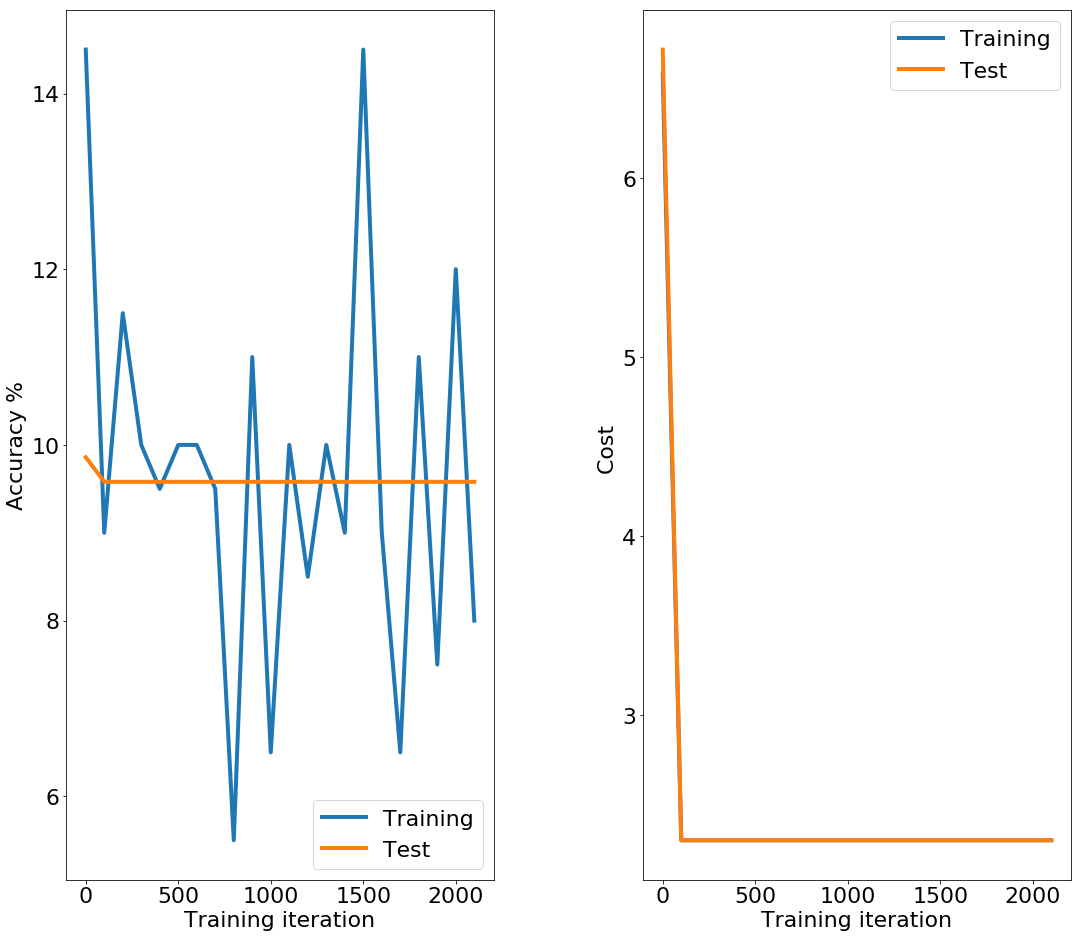

KeyboardInterrupt: 

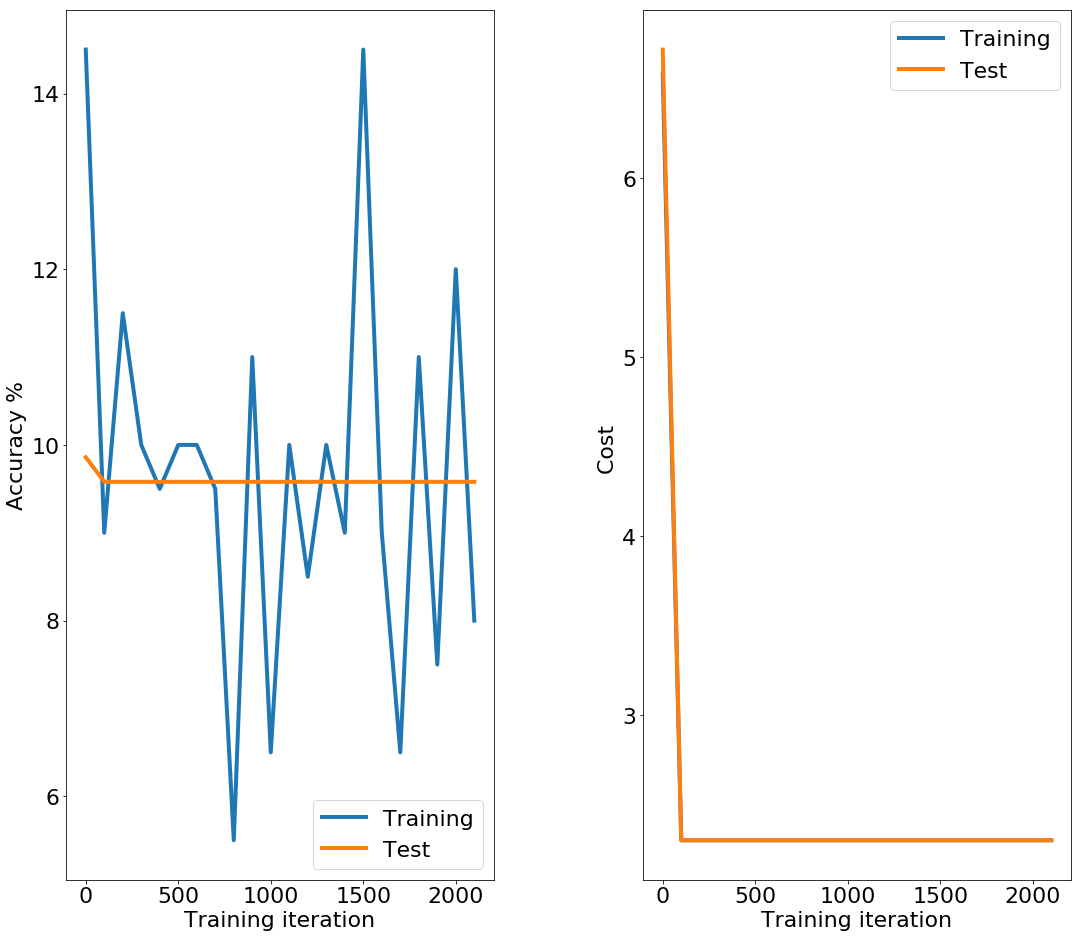

In [21]:


session=tf.Session()

#initialize all variables
session.run(tf.global_variables_initializer()) 

#start training 
optimize(num_iterations, batch_size)

...